from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

filtered_features= train_features.columns[list(features.k_feature_idx_)]

clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

# New Section

![Wrapper_1[1].png](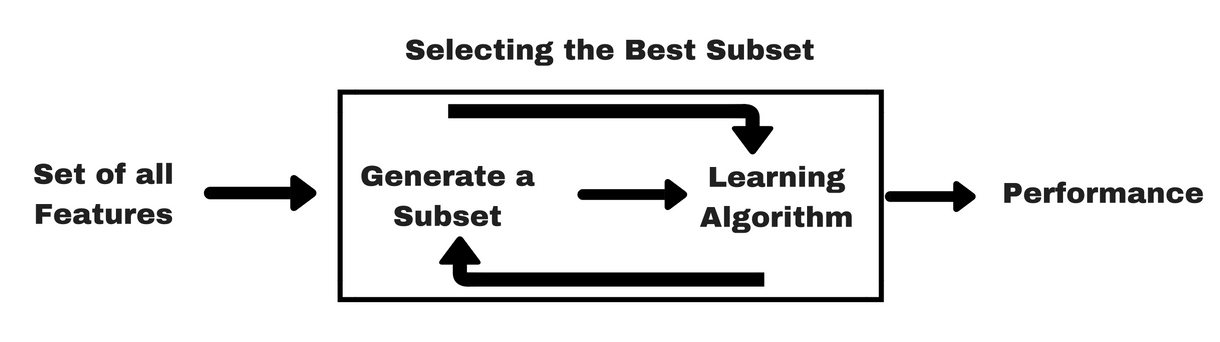)

/********************************************************************************************************************************************************************************************************************************************/

In [34]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# I changed this part
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
data.shape

(569, 33)

In [37]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [38]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [39]:
data = data.drop(["Unnamed: 32"],axis=1)
data = data.drop(["id"],axis=1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [41]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [42]:
# Capping the outlier rows with percentiles
upper_lim = data['fractal_dimension_worst'].quantile(.99)
lower_lim = data['fractal_dimension_worst'].quantile(.01)

In [43]:
print(upper_lim)
print(lower_lim)

0.14062800000000003
0.0585796


In [44]:
data.loc[(data['fractal_dimension_worst'] > upper_lim), 'fractal_dimension_worst'] = upper_lim
data.loc[(data['fractal_dimension_worst'] < lower_lim), 'fractal_dimension_worst'] = lower_lim
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.118900
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.089020
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.087580
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.140628
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.076780


In [45]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': -1})

In [46]:
# independent columns
x = data.drop(["diagnosis"],axis=1)
# pick last column for the target feature
y = data["diagnosis"]

In [47]:
x.shape

(569, 30)

In [48]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [49]:
y.value_counts()

-1    357
 1    212
Name: diagnosis, dtype: int64

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20, random_state = 44)

In [51]:
print('X_train after :',X_train.shape)
print('X_valid after :' , X_valid.shape)
print('y_train after :',y_train.shape)
print('y_valid after :' , y_valid.shape)

X_train after : (455, 30)
X_valid after : (114, 30)
y_train after : (455,)
y_valid after : (114,)


In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [54]:
#Calculating Prediction
y_predict_model = model.predict(X_valid)
y_predict_model

array([ 1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1])

In [55]:
#Calculating Details
print('model Train Score is : ' , model.score(X_train, y_train))
print('model Test Score is : ' , model.score(X_valid, y_valid))

model Train Score is :  1.0
model Test Score is :  0.9736842105263158


In [56]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict_model)
confusion_matrix

array([[74,  1],
       [ 2, 37]])

In [57]:
#print(model.feature_importances_)

In [58]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances

radius_mean                0.051784
texture_mean               0.021174
perimeter_mean             0.054416
area_mean                  0.058357
smoothness_mean            0.010683
compactness_mean           0.032604
concavity_mean             0.068546
concave points_mean        0.072696
symmetry_mean              0.006925
fractal_dimension_mean     0.006910
radius_se                  0.021678
texture_se                 0.006839
perimeter_se               0.019818
area_se                    0.043296
smoothness_se              0.007090
compactness_se             0.007292
concavity_se               0.009493
concave points_se          0.008012
symmetry_se                0.005612
fractal_dimension_se       0.006576
radius_worst               0.066612
texture_worst              0.033476
perimeter_worst            0.081346
area_worst                 0.068953
smoothness_worst           0.017486
compactness_worst          0.027128
concavity_worst            0.053097
concave points_worst       0

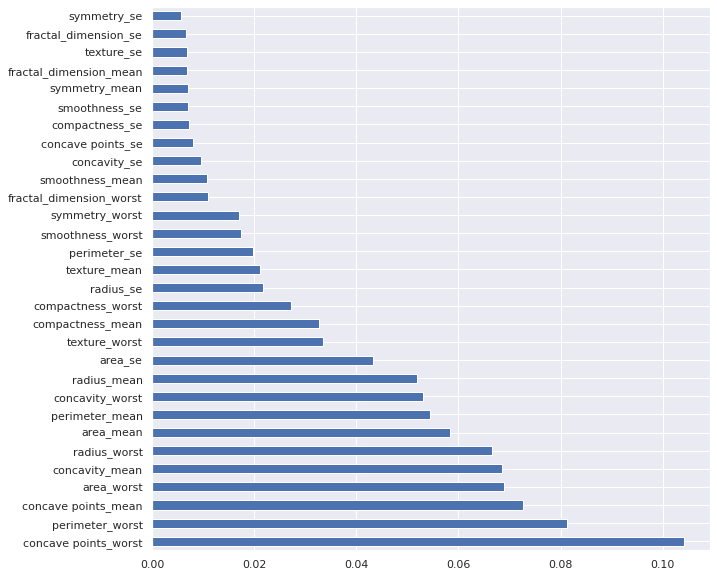

In [59]:
plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [60]:
columns=X_train[['fractal_dimension_se', 'symmetry_se' , 'smoothness_se' , 'symmetry_mean', 'fractal_dimension_mean','texture_se','compactness_se','concavity_se','concave points_se','smoothness_mean','symmetry_worst','fractal_dimension_worst','area_se','radius_se']]
X_train_2=X_train.drop(columns, axis=1)

columns=X_valid[['fractal_dimension_se', 'symmetry_se' , 'smoothness_se' , 'symmetry_mean', 'fractal_dimension_mean','texture_se','compactness_se','concavity_se','concave points_se','smoothness_mean','symmetry_worst','fractal_dimension_worst','area_se','radius_se']]
X_valid_2=X_valid.drop(columns, axis=1)

In [61]:
print(X_train_2.columns)
print(X_train_2.shape)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
(455, 16)


In [62]:
model_2 = ExtraTreesClassifier()
model_2.fit(X_train_2,y_train)

#Calculating Prediction
y_predict_model_2 = model_2.predict(X_valid_2)
print(y_predict_model_2)
print("-*-"*40)
#Calculating Details
print('model_2 Train Score is : ' , model_2.score(X_train_2, y_train))
print('model_2 Test Score is : ' , model_2.score(X_valid_2, y_valid))

[ 1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1
  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
model_2 Train Score is :  1.0
model_2 Test Score is :  0.9736842105263158


In [63]:
print(model_2.score(X_valid_2, y_valid)-model.score(X_valid, y_valid))

0.0


[[74  1]
 [ 2 37]] 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

[0.0517844  0.02117364 0.05441561 0.05835652 0.0106833  0.03260421
 0.06854571 0.07269588 0.00692517 0.00690962 0.0216778  0.00683933
 0.01981807 0.04329621 0.00709035 0.00729239 0.00949263 0.00801218
 0.00561204 0.00657567 0.06661156 0.0334764  0.08134555 0.06895333
 0.01748577 0.02712755 0.05309656 0.10410985 0.01703945 0.01095324] 



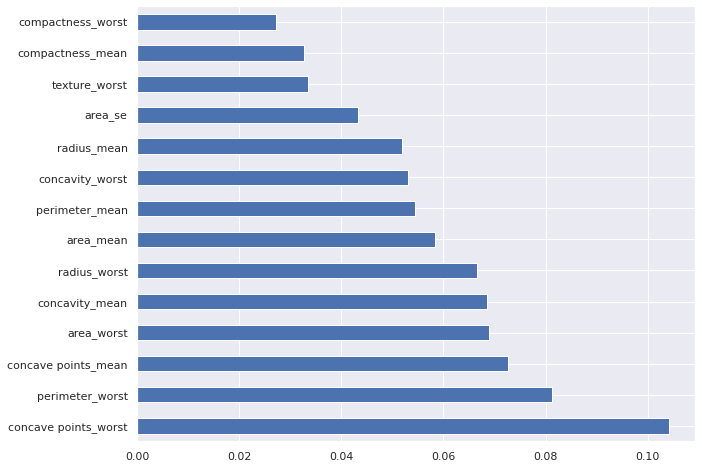

In [64]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict_model_2)
print(confusion_matrix,"\n")
print("-*-"*40 , "\n")
print(model.feature_importances_ ,"\n")
plt.figure(figsize=(10,8))
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build EXC classifier to use in feature selection

clf = ExtraTreesClassifier(n_estimators=60, n_jobs=-1,random_state=42)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=9)

# Perform SFFS
sfs1 = sfs1.fit(X_train_2, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   40.9s finished

[2022-10-15 13:18:57] Features: 1/10 -- score: 0.8748148148148148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   30.1s finished

[2022-10-15 13:19:27] Features: 2/10 -- score: 0.9514161220043573[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   29.7s finished

[2022-10-15 13:19:56] Features: 3/10 -- score: 0.9580392156862746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [66]:
#help(sfs)

In [67]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 7, 9, 10, 11, 12, 13, 15]


The columns at these indexes are those which were selected, which is very good, now we can build on those features to build a full model using our training and test sets

In [68]:
columns=X_train_2[['area_mean', 'compactness_mean' , 'concavity_mean' , 'perimeter_se', 'compactness_worst','concavity_worst','concave points_worst']]
X_train_3=X_train_2.drop(columns, axis=1)

columns=X_valid_2[['area_mean', 'compactness_mean' , 'concavity_mean' , 'perimeter_se', 'compactness_worst','concavity_worst','concave points_worst']]
X_valid_3=X_valid_2.drop(columns, axis=1)

In [69]:
from sklearn.metrics import accuracy_score as acc
# Build full model with selected features
clf = ExtraTreesClassifier(random_state=42)

clf.fit(X_train_3, y_train)

ExtraTreesClassifier(random_state=42)

In [70]:
#Calculating Prediction for train data 
y_predict_train_model_3 = clf.predict(X_train_3)
#Calculating Prediction for test data 
y_predict_test_model_3 = clf.predict(X_valid_3)

In [71]:
from sklearn.metrics import accuracy_score
print("accuracy of train data ",accuracy_score(y_train, y_predict_train_model_3))
print("accuracy of test data ",accuracy_score(y_valid, y_predict_test_model_3))

accuracy of train data  1.0
accuracy of test data  0.9824561403508771


After using the forward selection method, the accuracy level has increased significantly.

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_valid,y_predict_test_model_3)

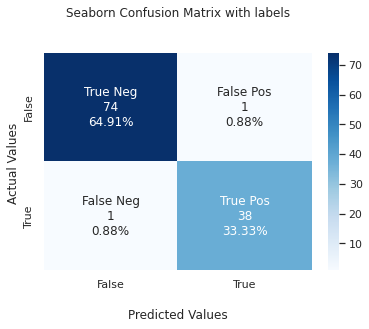

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()